Скачиваем данные с использованием библиотеки yfinance. Выбраны топ-5 компаний по капитализации. В задании указано, что трейдинг будет либо краткосрочным, либо среднесрочным, поэтому используются часовые графики этих бумаг.

In [10]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import normaltest, shapiro

# Список тикеров
tickers = ['MSFT', 'AAPL', 'NVDA', 'GOOG', 'AMZN']

# Загрузка данных по тикерам
data = yf.download(tickers, period='1y', interval='1h', group_by='ticker')

# Добавление колонки "Range" для каждого тикера
for ticker in tickers:
    data[(ticker, 'Range')] = data[(ticker, 'High')] - data[(ticker, 'Low')]

[*********************100%%**********************]  5 of 5 completed


Рисуем графики с использованием plotly.

In [2]:
# Отображение данных по каждому тикеру
for ticker in tickers:
    print(f"Данные для {ticker}:")

    # Создание и отображение свечного графика с использованием plotly
    fig = go.Figure(data=[go.Candlestick(x=data.index,
                                         open=data[(ticker, 'Open')],
                                         high=data[(ticker, 'High')],
                                         low=data[(ticker, 'Low' )],
                                         close=data[(ticker, 'Close' )])])

    fig.update_layout(title=f'Stock Price Data for {ticker}',
                      xaxis_title='Date',
                      yaxis_title='Price (USD)',
                      xaxis_rangeslider_visible=False)
    
    fig.show()

Данные для MSFT:


Данные для AAPL:


Данные для NVDA:


Данные для GOOG:


Данные для AMZN:


Рисуем все инструменты на одном графике с использованием matplotlib

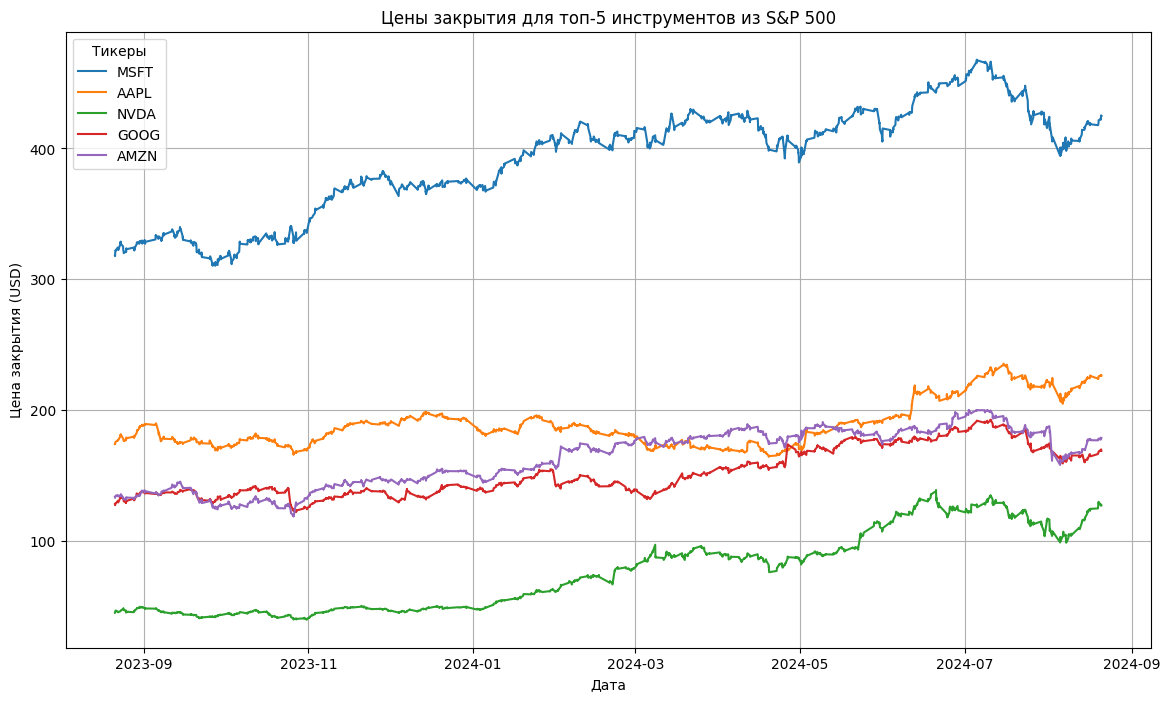

In [3]:
# Построение графиков цен закрытия для каждого тикера
plt.figure(figsize=(14, 8))

for ticker in tickers:
    # Доступ к данным с использованием MultiIndex
    plt.plot(data.index, data[(ticker, 'Close' )], label=ticker)

# Настройка графика
plt.title('Цены закрытия для топ-5 инструментов из S&P 500')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (USD)')
plt.legend(title='Тикеры')
plt.grid(True)

# Отображение графика
plt.show()

Нормализуем значение цен инструментов

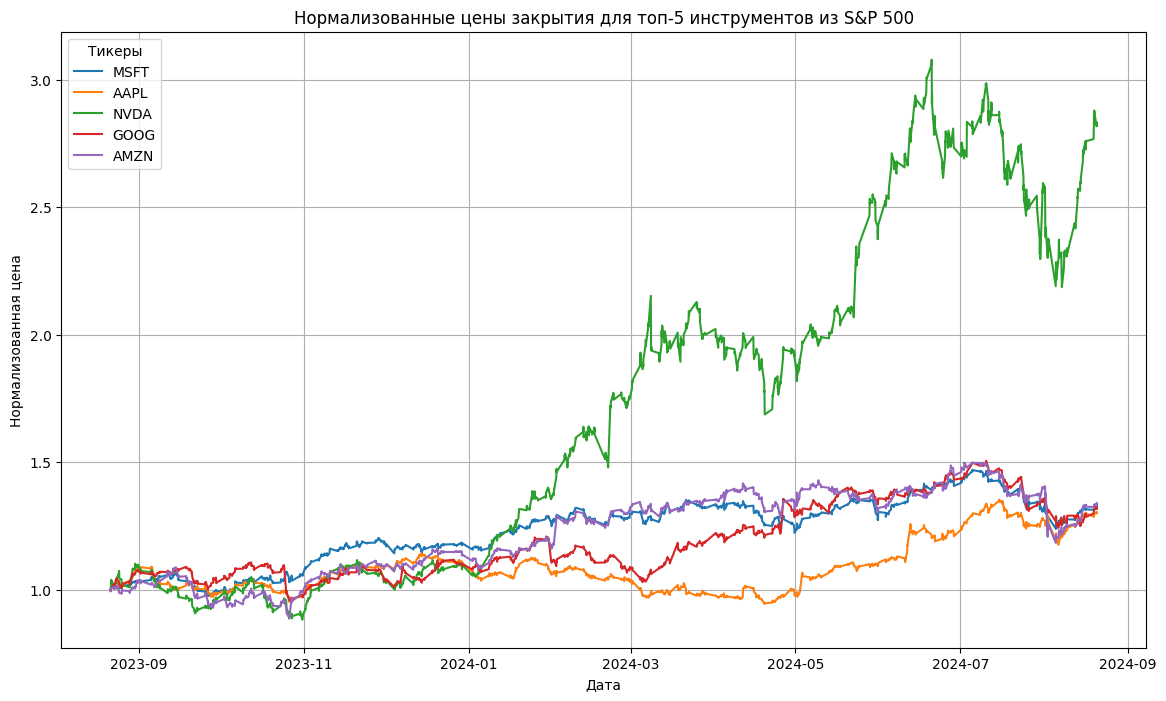

In [4]:
# Нормализация данных (приведение к одному диапазону)
normalized_data = pd.DataFrame()

for ticker in tickers:
    # Нормализация цен закрытия для каждого тикера
    normalized_data[ticker] = data[(ticker, 'Close',)] / data[(ticker, 'Close')].iloc[0]

# Построение графиков нормализованных цен закрытия
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(normalized_data.index, normalized_data[ticker], label=ticker)

# Настройка графика
plt.title('Нормализованные цены закрытия для топ-5 инструментов из S&P 500')
plt.xlabel('Дата')
plt.ylabel('Нормализованная цена')
plt.legend(title='Тикеры')
plt.grid(True)

# Отображение графика
plt.show()

Проверяем на пропуски

In [5]:
# Проверка на наличие пропусков
missing_values = data.isnull().sum()
print("Пропуски в данных:")
print(missing_values[missing_values > 0])

Пропуски в данных:
Series([], dtype: int64)


Рисуем "ящики с усами" для анализа выбрасов

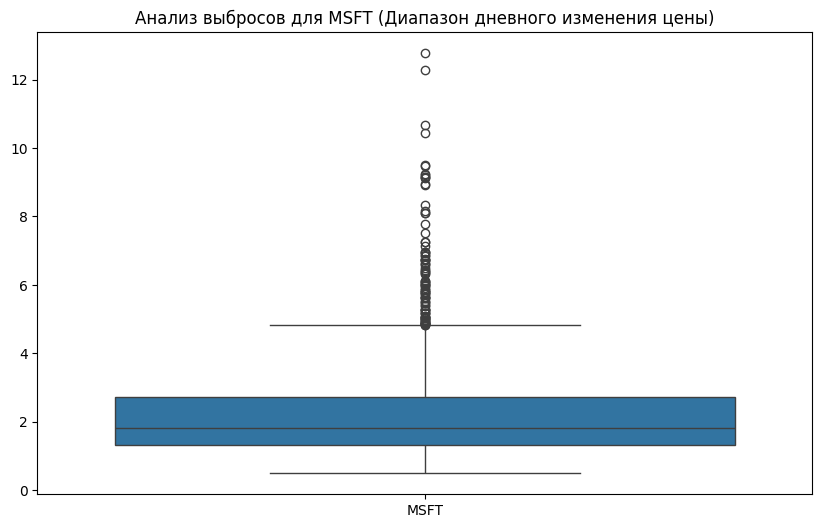

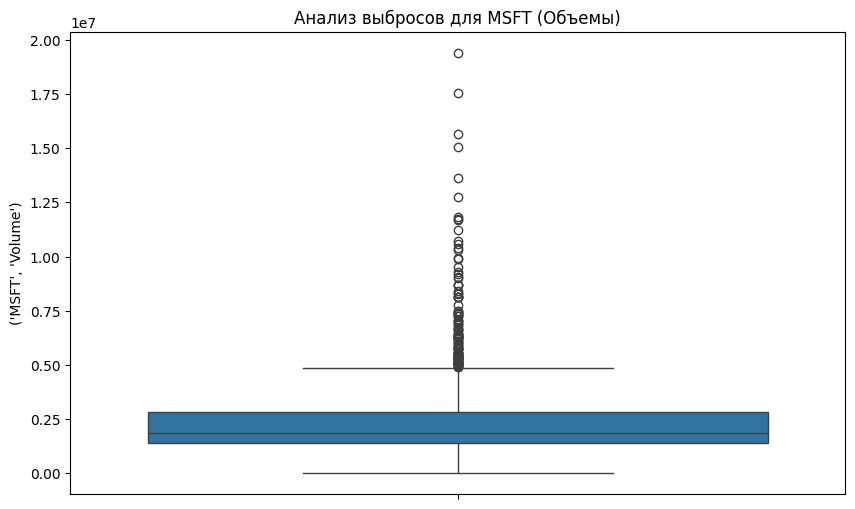

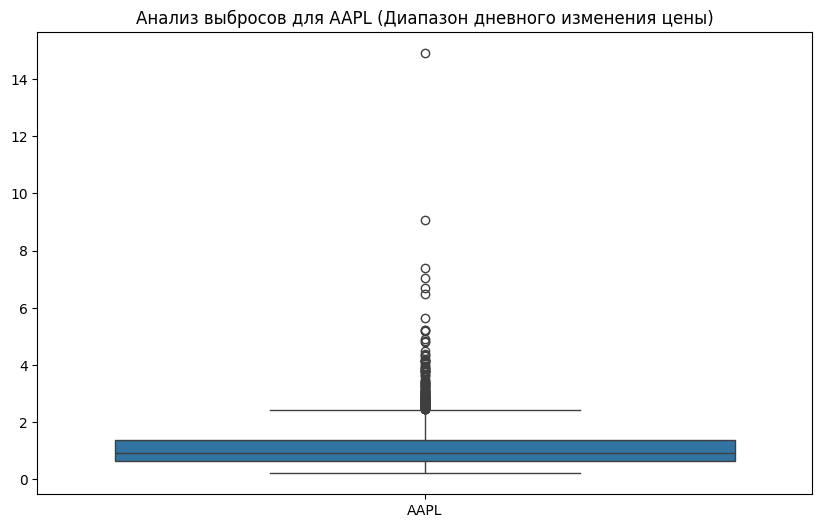

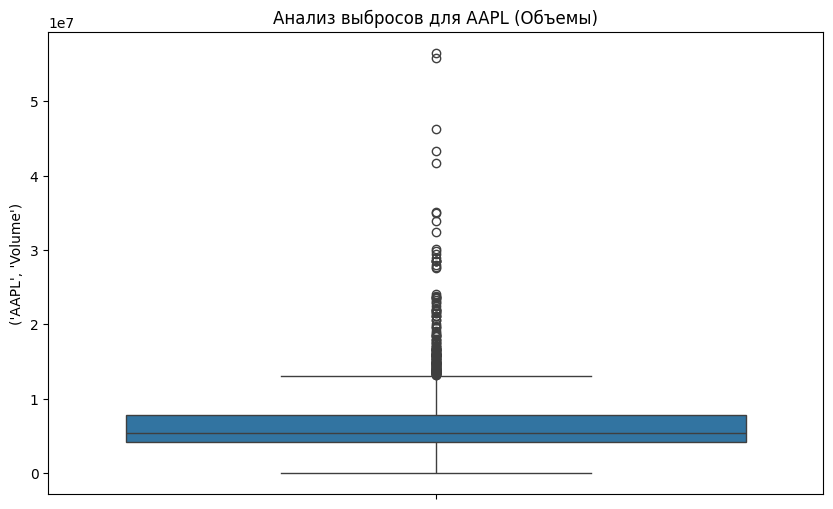

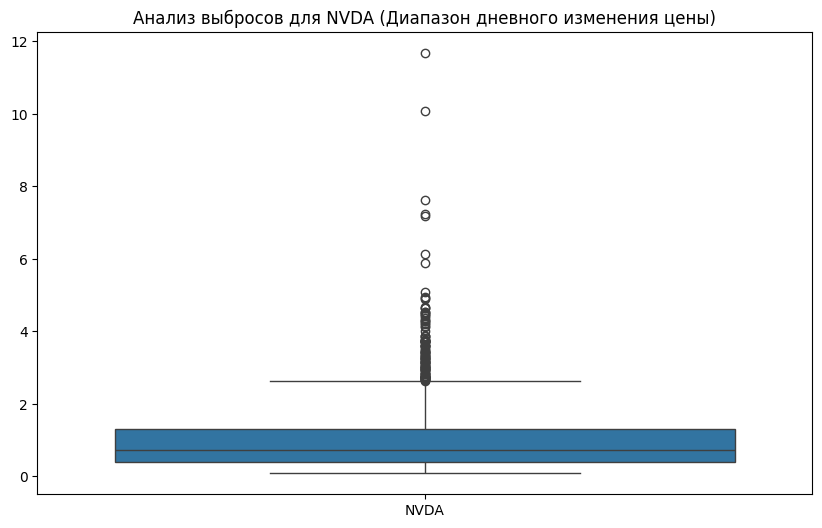

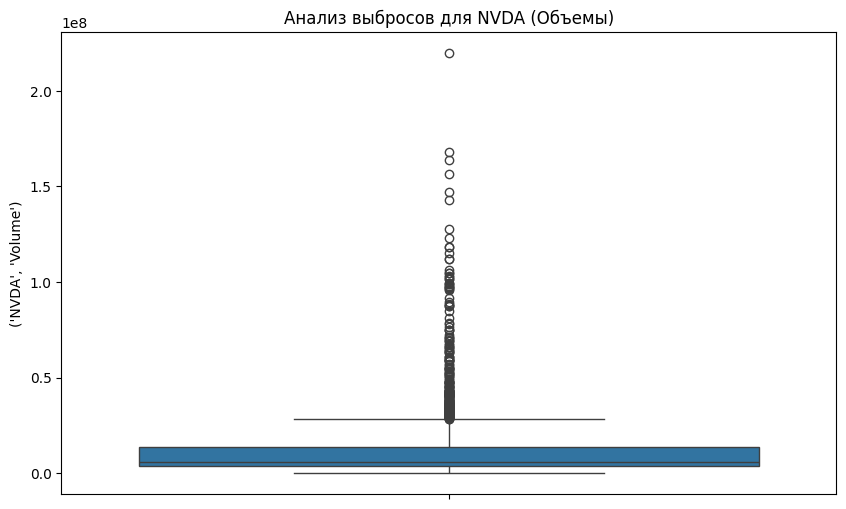

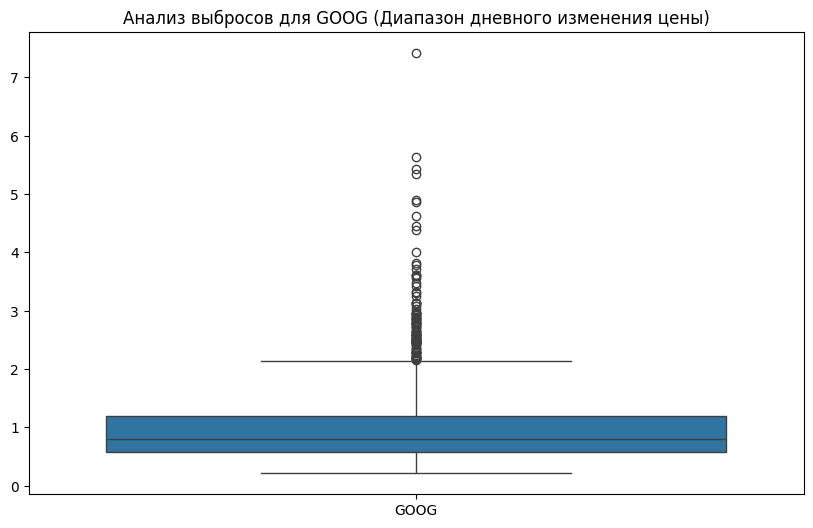

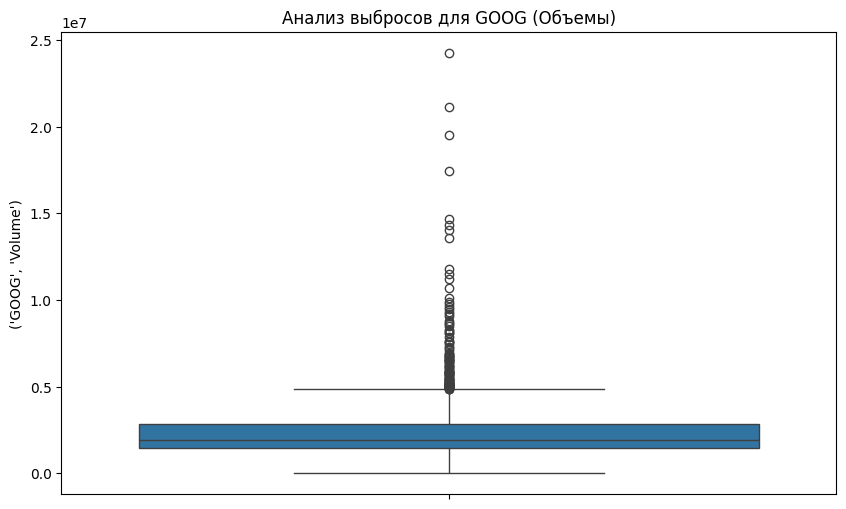

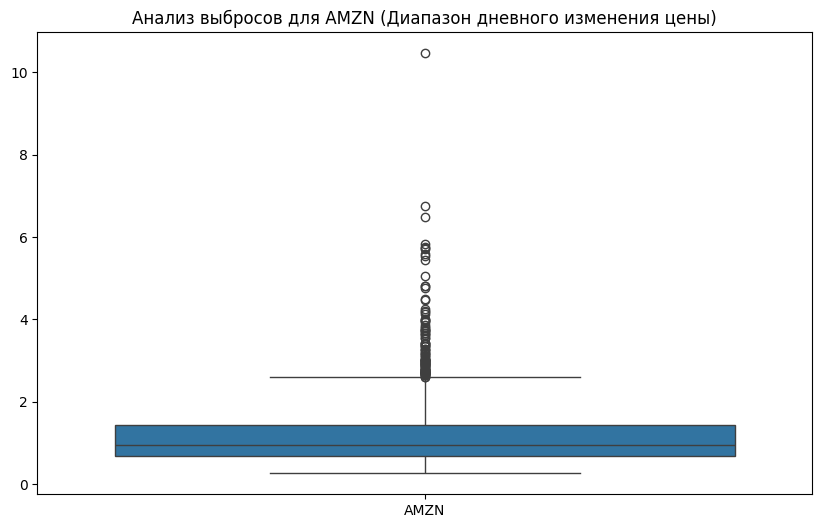

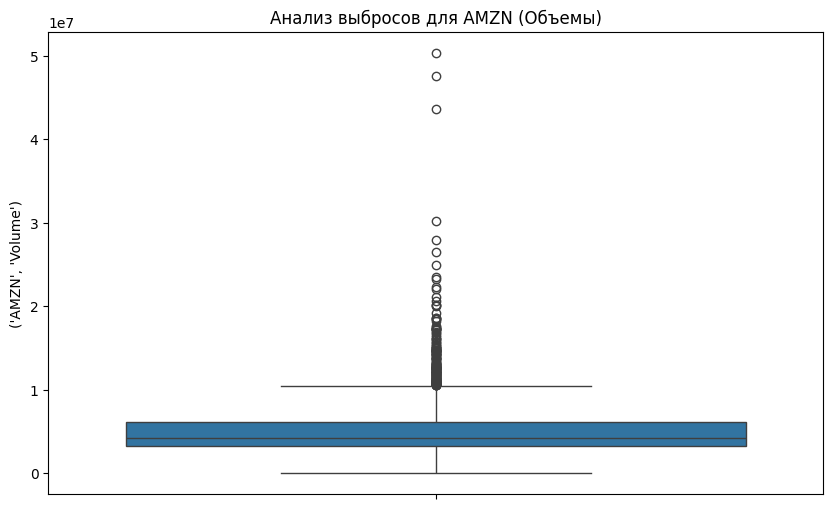

In [6]:
# Визуализация выбросов для каждого инструмента
for ticker in tickers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data[[(ticker, 'Range')]])
    plt.title(f"Анализ выбросов для {ticker} (Диапазон дневного изменения цены)")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data[(ticker, 'Volume')])
    plt.title(f"Анализ выбросов для {ticker} (Объемы)")
    plt.show()



Скорее всего это реальные откланения цены и объема, а не выбросы. Построим распределение дневных диапазонов.

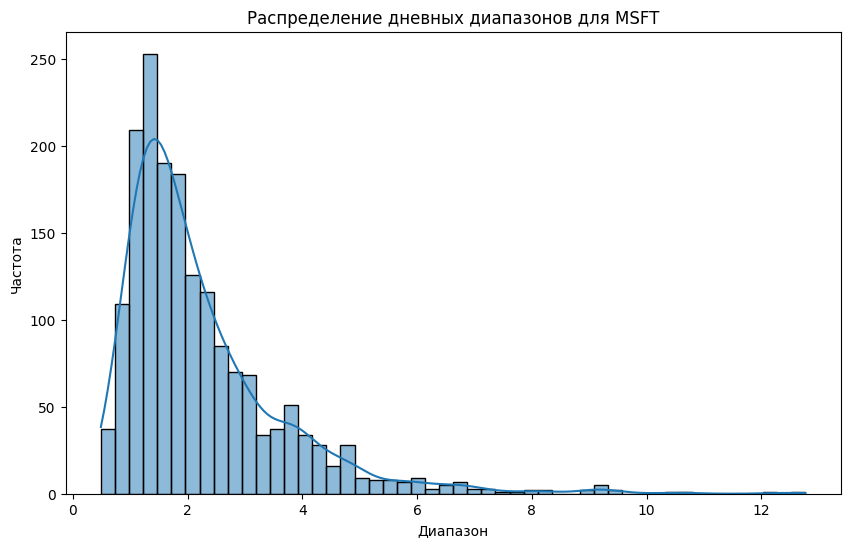

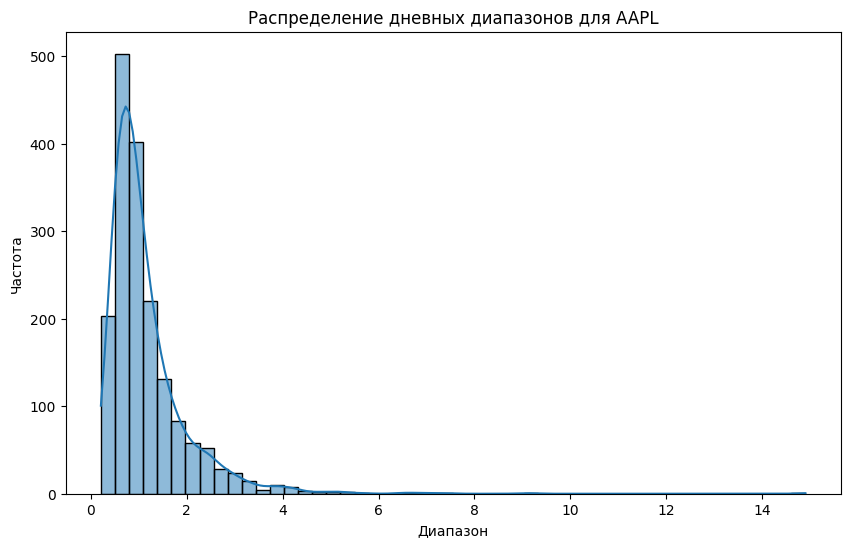

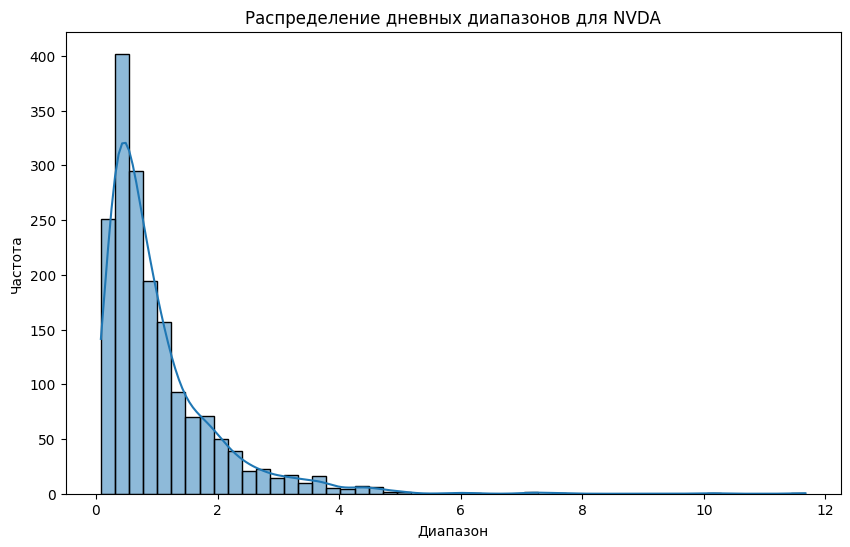

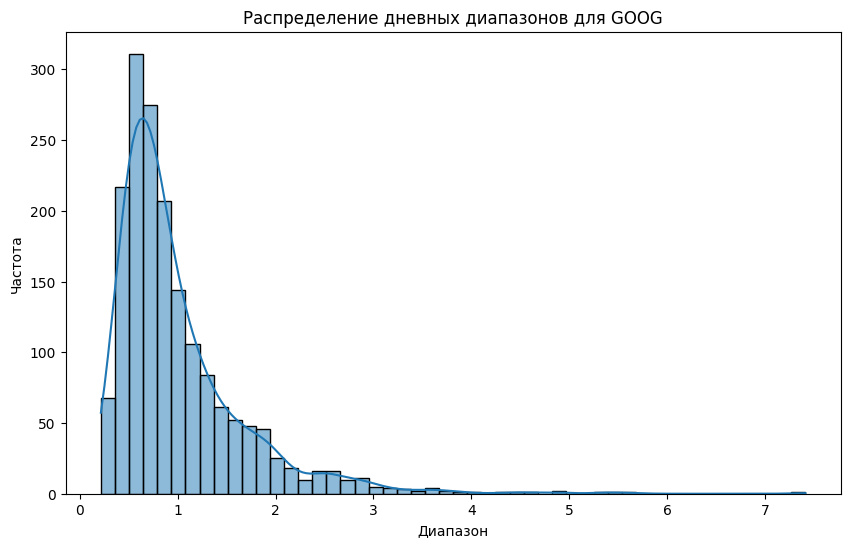

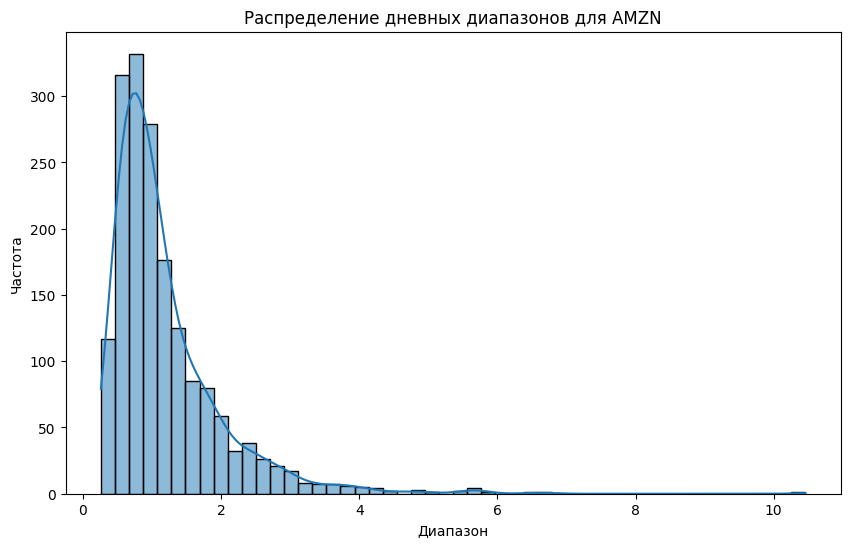

In [7]:
# Построение распределения диапазонов для каждого тикера
for ticker in tickers:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[(ticker, 'Range')], kde=True, bins=50)
    plt.title(f"Распределение дневных диапазонов для {ticker}")
    plt.xlabel('Диапазон')
    plt.ylabel('Частота')
    plt.show()

Логарифмируем дневные диапазоны

Статистика теста: 7.106
На уровне значимости 15.0%: отвергается гипотеза о нормальности.
На уровне значимости 10.0%: отвергается гипотеза о нормальности.
На уровне значимости 5.0%: отвергается гипотеза о нормальности.
На уровне значимости 2.5%: отвергается гипотеза о нормальности.
На уровне значимости 1.0%: отвергается гипотеза о нормальности.


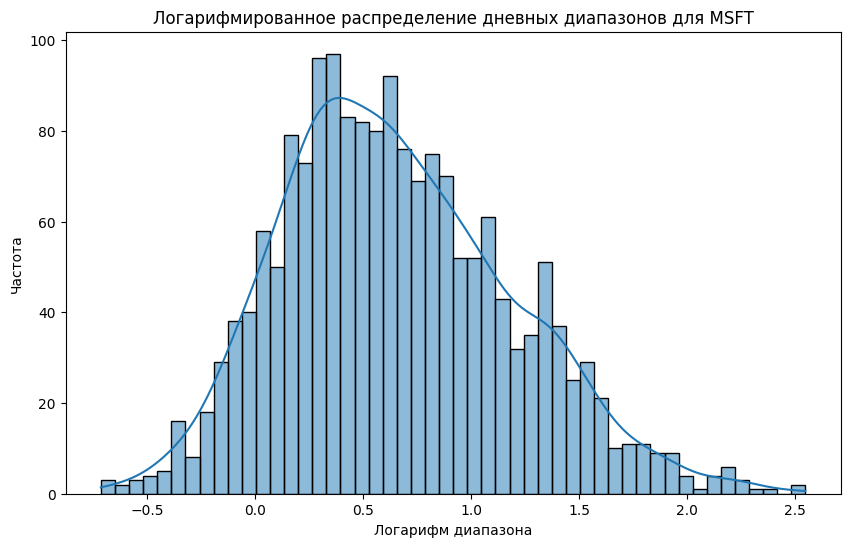

Статистика теста: 7.755
На уровне значимости 15.0%: отвергается гипотеза о нормальности.
На уровне значимости 10.0%: отвергается гипотеза о нормальности.
На уровне значимости 5.0%: отвергается гипотеза о нормальности.
На уровне значимости 2.5%: отвергается гипотеза о нормальности.
На уровне значимости 1.0%: отвергается гипотеза о нормальности.


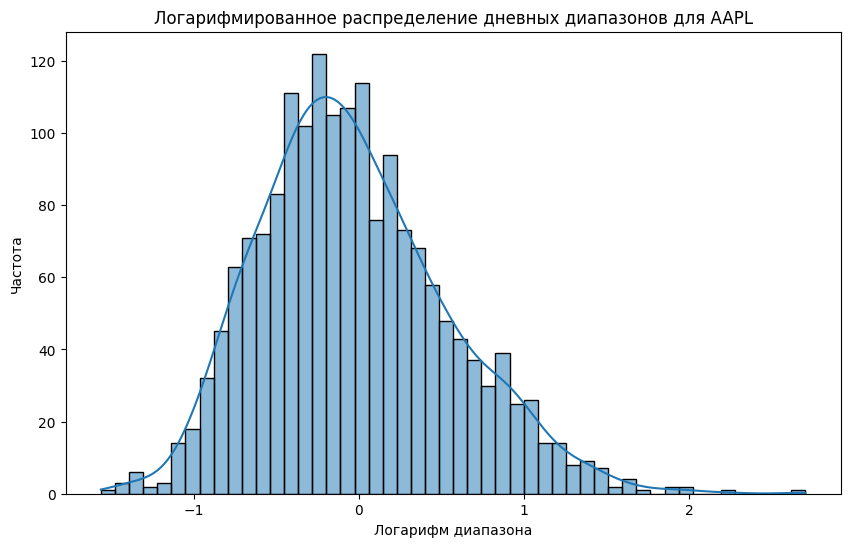

Статистика теста: 3.980
На уровне значимости 15.0%: отвергается гипотеза о нормальности.
На уровне значимости 10.0%: отвергается гипотеза о нормальности.
На уровне значимости 5.0%: отвергается гипотеза о нормальности.
На уровне значимости 2.5%: отвергается гипотеза о нормальности.
На уровне значимости 1.0%: отвергается гипотеза о нормальности.


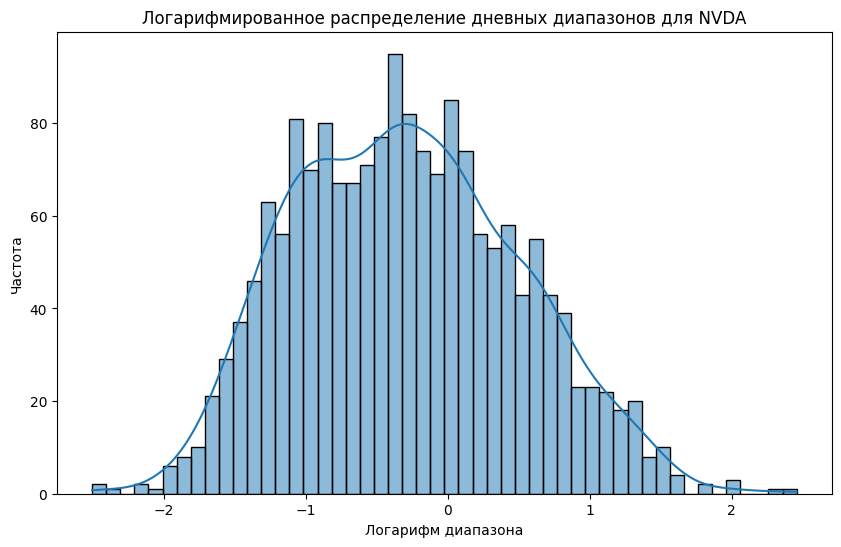

Статистика теста: 8.040
На уровне значимости 15.0%: отвергается гипотеза о нормальности.
На уровне значимости 10.0%: отвергается гипотеза о нормальности.
На уровне значимости 5.0%: отвергается гипотеза о нормальности.
На уровне значимости 2.5%: отвергается гипотеза о нормальности.
На уровне значимости 1.0%: отвергается гипотеза о нормальности.


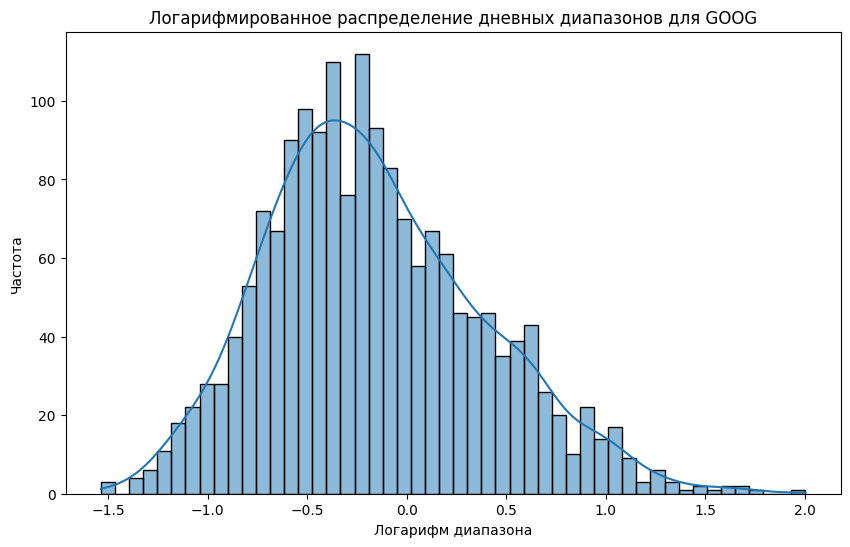

Статистика теста: 6.433
На уровне значимости 15.0%: отвергается гипотеза о нормальности.
На уровне значимости 10.0%: отвергается гипотеза о нормальности.
На уровне значимости 5.0%: отвергается гипотеза о нормальности.
На уровне значимости 2.5%: отвергается гипотеза о нормальности.
На уровне значимости 1.0%: отвергается гипотеза о нормальности.


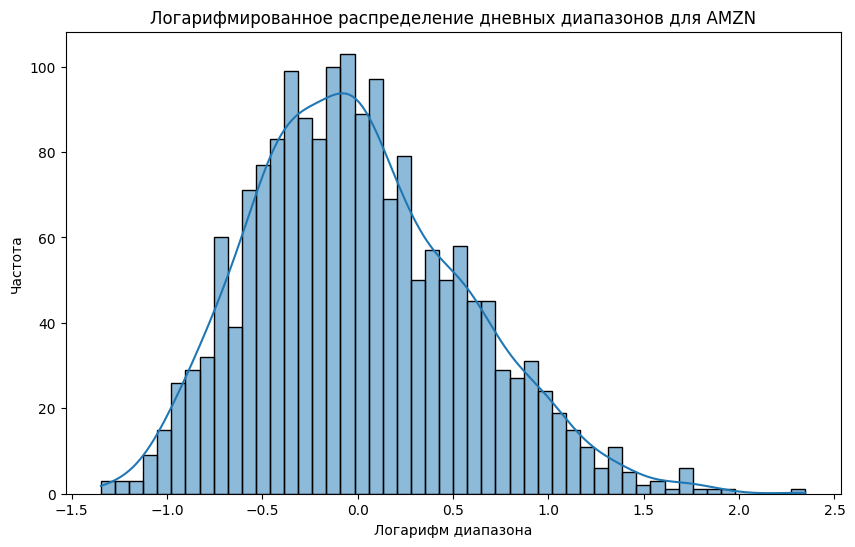

In [12]:
from scipy.stats import anderson

for ticker in tickers:
    # Исключаем нулевые и отрицательные значения перед логарифмированием
    range_data = data[(ticker, 'Range')]
    range_data = range_data[range_data > 0]
    
    # Применяем натуральный логарифм
    log_range_data = np.log(range_data)
    
    # Проведение теста Шапиро-Уилка
   

    # Предположим, что у вас есть логарифмированные данные дневных диапазонов (log_returns)
    result = anderson(log_range_data)

    print('Статистика теста: %.3f' % result.statistic)

    # Пороговые значения для разных уровней значимости
    for i in range(len(result.critical_values)):
        significance_level, critical_value = result.significance_level[i], result.critical_values[i]
        if result.statistic < critical_value:
            print(f"На уровне значимости {significance_level}%: не удается отвергнуть гипотезу о нормальности.")
        else:
            print(f"На уровне значимости {significance_level}%: отвергается гипотеза о нормальности.")
        # Построение логарифмированного распределения
    plt.figure(figsize=(10, 6))
    sns.histplot(log_range_data, kde=True, bins=50)
    plt.title(f"Логарифмированное распределение дневных диапазонов для {ticker}")
    plt.xlabel('Логарифм диапазона')
    plt.ylabel('Частота')
    plt.show()

Видем, что даже логорифмированные распределения отличаются от нормального.